# Explo - Focus Bisphenol

par Zakarie Bouabida et Galaad Bastos

février 2025

## **Documetation à propos du Bisphénol**

#### Qu'est-ce que le Bisphenol ?
Le bisphénol est un composé chimique utilisé principalement dans la fabrication de plastiques et de résines. Le plus connu est le bisphénol A (BPA), mais il existe aussi des variantes comme le bisphénol S (BPS) et le bisphénol F (BPF).
#### Où trouve-t-on du bisphénol ?
Le BPA est présent dans :
- Les plastiques alimentaires (bouteilles, boîtes de conserve, emballages).
- Les résines époxy (revêtements intérieurs des canettes et conserves).
- Les tickets de caisse (papier thermique).
- Certains dispositifs médicaux et matériaux dentaires.
#### Pourquoi retrouve-t-on ce composant dans l’eau du robinet ?
Le bisphénol A (BPA) et ses alternatives (BPS, BPF) se retrouvent dans l’eau du robinet principalement à cause de la contamination environnementale.
- Cela peut être dû au Lessivage des plastiques et des résines, le BPA est utilisé dans la fabrication de canalisations en PVC, de revêtements de réservoirs et de certaines stations d’épuration. Avec le temps, il peut se dégrader et s’infiltrer dans l’eau potable.
- Les rejets industriels et urbains sont un facteur de présence du BPA, des usines produisant du plastique ou des résines époxy rejettent des résidus contenant du bisphénol dans les rivières et nappes phréatiques.
- Les décharges et incinérateurs peuvent aussi libérer du BPA dans l’environnement.
- Les bouteilles plastiques, emballages alimentaires et tickets de caisse finissent parfois dans les cours d’eau. Sous l’effet des UV et des micro-organismes, ils se dégradent et libèrent du BPA.
- L'inefficacité du traitement des eaux, les stations d’épuration ne filtrent pas totalement le bisphénol, qui peut rester en faible concentration dans l’eau potable.

#### Quels sont les dangers du bisphénol A pour la santé et l'environnement ?
Le bisphénol A (BPA) est un perturbateur endocrinien reconnu, capable de mimer l'action des hormones œstrogènes et d'interférer avec le système hormonal humain. Cette interaction peut entraîner divers effets néfastes sur la santé.

**Effets sur la santé humaine**
- Système immunitaire : Des études ont montré que le BPA peut endommager le système immunitaire humain, même à de très faibles doses. [source](https://www.eea.europa.eu/fr/highlights/lexposition-du-public-au-bisphenol)

- Reproduction et développement : Le BPA est classé comme toxique pour la reproduction suspecté depuis 2002. Il peut affecter la fertilité et, chez la femme enceinte, perturber le développement du fœtus. [source](https://www.ecologie.gouv.fr/politiques-publiques/bisphenol)

- Foie et reins : L'exposition au BPA est associée à des effets néfastes sur le foie et les reins. [source](https://www.canada.ca/fr/sante-canada/services/sante-environnement-milieu-travail/rapports-publications/contaminants-environnementaux/ressources-biosurveillance-humaine/bisphenol-a-population-canadienne.html)

**Effets sur l'environnement**
- Le BPA, en tant que perturbateur endocrinien, peut altérer la stabilité des écosystèmes aquatiques. Il affecte la reproduction et le développement de diverses espèces, notamment les poissons, ce qui peut entraîner des déséquilibres écologiques. [source](https://www.anses.fr/fr/content/le-bisphénol-b-un-perturbateur-endocrinien-pour-l’homme-et-l’environnement)

En raison de ces risques, plusieurs pays ont pris des mesures pour limiter l'utilisation du BPA, notamment en l'interdisant dans les contenants alimentaires. Cependant, sa présence persistante dans l'environnement continue de soulever des préoccupations quant à ses impacts sur la santé publique et les écosystèmes.

## **Objectifs du Notebook**

- Identifier les prélèvements où du Bisphénol est retrouvé dans la base de données
- Analyser les résultats et leur conformité
- Analyser leur situation géographique 
- Conclusions et recommandations

In [63]:
import pandas as pd
import duckdb

In [64]:
# pandas setting
pd.set_option("display.max_columns", None)  # show all cols
pd.set_option("display.max_colwidth", None)  # show full width of showing cols

In [65]:
# database connection
con = duckdb.connect(database="./../../database/data.duckdb", read_only=True)

In [66]:
# bisphenol results selection + geographic informations
query = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."cdreseau",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libminparametre",
  "edc_resultats"."valtraduite",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux",
  "edc_resultats"."limitequal"
  
FROM "edc_prelevements"
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE "edc_resultats"."libminparametre" ILIKE 'bisph%'
"""

In [67]:
# bisphenol dataframe creation
bisphenol = con.sql(query)
bisphenol_df = bisphenol.df()
bisphenol_df

,referenceprel,cdreseau,dateprel,nomcommuneprinc,libminparametre,valtraduite,rqana,cdunitereferencesiseeaux,limitequal
0,01600113398,016000407,2022-02-15,LUXE,Bisphénol A,0.0,"<0,05",µg/L,"<=2,5 µg/L"
1,01600116326,016003492,2022-10-19,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
2,01600116736,016003492,2022-12-07,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
3,01600116326,016001283,2022-10-19,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
4,01600116736,016001283,2022-12-07,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
5,01600116326,016000365,2022-10-19,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
6,01600116736,016000365,2022-12-07,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,1",µg/L,"<=2,5 µg/L"
7,01600117793,016003492,2023-04-19,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,05",µg/L,"<=2,5 µg/L"
8,01600117951,016003492,2023-05-03,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,05",µg/L,"<=2,5 µg/L"
9,01600118206,016003492,2023-06-14,ANGEAC-CHARENTE,Bisphénol A,0.0,"<0,05",µg/L,"<=2,5 µg/L"


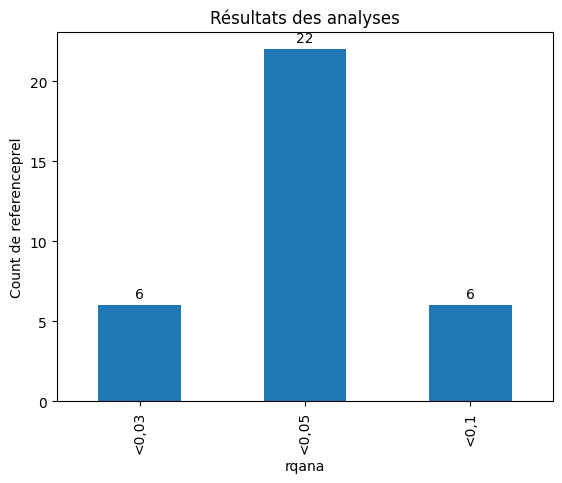

In [68]:
import matplotlib.pyplot as plt

# count of results
results_df = bisphenol_df.groupby("rqana")["referenceprel"].count()

# graph creation
ax = results_df.plot(kind="bar")
ax.bar_label(ax.containers[0], fmt="%d", padding=3)  # bar labels
plt.xlabel("rqana")
plt.ylabel("Count de referenceprel")
plt.title("Résultats des analyses")
plt.show()

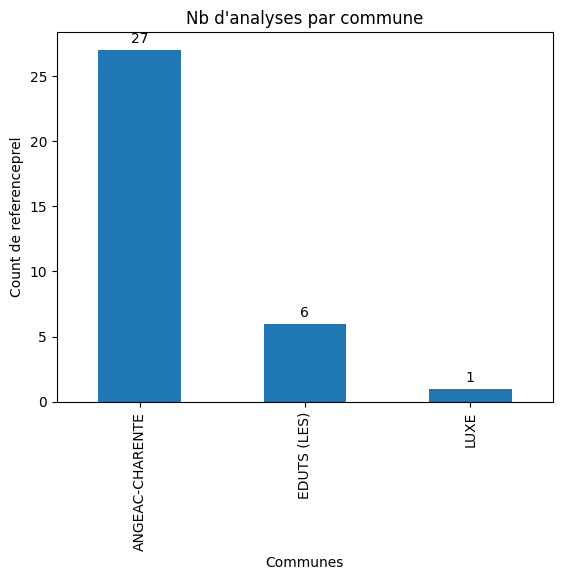

In [69]:
# count of results
communes_df = bisphenol_df.groupby("nomcommuneprinc")["referenceprel"].count()

# graph creation
ax = communes_df.plot(kind="bar")
ax.bar_label(ax.containers[0], fmt="%d", padding=3)  # bar labels
plt.xlabel("Communes")
plt.ylabel("Count de referenceprel")
plt.title("Nb d'analyses par commune")
plt.show()

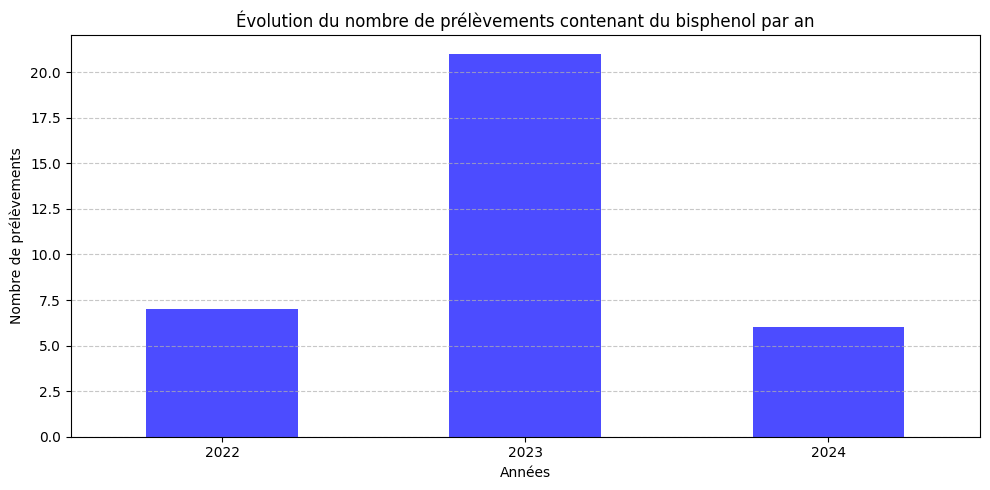

In [70]:
# conversion to datetime
bisphenol_df["dateprel"] = pd.to_datetime(bisphenol_df["dateprel"])
bisphenol_df["annee"] = bisphenol_df["dateprel"].dt.year

# count of results
counts_df = bisphenol_df.groupby("annee")["referenceprel"].count()

# graph creation
plt.figure(figsize=(10, 5))
ax = counts_df.plot(kind="bar", color="b", alpha=0.7)
plt.xlabel("Années")
plt.ylabel("Nombre de prélèvements")
plt.title("Évolution du nombre de prélèvements contenant du bisphenol par an")
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## **Résultats**

- **Prélèvements**

Très peu d'analyses focalisées sur la présence de Bisphénol, et elles concernent toutes le Bisphénol A.
Il y en a 34 au total sur la base de données, et elles sont toutes dans la catégorie C (conformes) car aucun ne dépasse les 0.1µg/L.

- **Géographie**

Majorité des analyses concentrées sur la commune d'Angeac-Charente, en Charente Maritime. La commune des Éduts se trouve à une cinquantaine de km d'Angeac-Charente. Toutes deux se trouvent à proximité d'Angoulême.

Fait notable de la commune d'Angeac-Charente, elle se trouve sur deux zones Natura 2000.
La commune d’Angeac-Charente est concernée par le **SDAGE 2022-2027** du bassin Adour-Garonne et le SAGE « Charente », qui définissent les objectifs de **gestion et de protection des ressources en eau du territoire**. Ces plans visent à réduire les pollutions, assurer l’équilibre quantitatif de l’eau et restaurer les milieux aquatiques, avec des exigences renforcées sur la qualité des captages. Ceci expliquerait peut-être les mesures sur le Bisphénol A dans cette commune depuis 2022.



- **Temporaire** 

Nous constatons que la présence de bisphénol a été détectée à partir de l'année 2022, avec une hausse importante en 2023, qui enregistre le plus grand nombre de prélèvements (plus de 20 analyses), contre seulement 6 à 7 prélèvements en 2022 et 2024.


- **Conclusions**

Au vu de la dangerosité avérée du Bisphénol et notamment du Bisphénol A, il est étonnant que si peu de mesures soient effectuées à travers le territoire français ces 4 dernières années. Seuls 34 prélèvements sont dénombrés dans la base de données.

Nous ne pouvons que recommander d'augmenter le nombre de prélèvements et d'analyses de détection au Bisphénol, afin de s'assurer de la conformité du réseau d'eau potable français quant à ce dangereux polluant.